<a href="https://colab.research.google.com/github/AmnaShahbaz7/Facebook_Prophet_Time_Series_Analysis/blob/main/Forecasting_using_Facebook_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis with Facebook Prophet
## AppDS-Artificial Neural Networks and Deep Learning II

---

#### Author: Amna Shahbaz

### Installation of Prophet

In [ ]:
pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
  error: subprocess-exited-with-error
  
  × Running setup.py install for fbprophet did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Running setup.py install for fbprophet ... error
error: legacy-install-failure

× Encountered error while trying to install package.
╰─> fbprophet

note: This is an issue with the package mentioned above, not pip.
hint: See

### Loaded needed librairies

In [ ]:
from prophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import data:

#### The dataset consists of three columns date, cases and deaths. It seems to be a disease dataset, where we see different number of daily cases and deaths according to several years. We can see that there are 1087 instances in the data set.

In [ ]:
df = pd.read_csv('/content/data.csv')
df.shape

(1087, 3)

### Preview the dataset

In [ ]:
df.head()

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0


### Summary of dataset
##### As you see, there are no missing values in the dataset and. The data types are object and int64 respectively. The Prophet library expects as input a dataframe with one column containing the time information, and another column containing the metric that we wish to forecast.The important thing is here that the date column must be of the datetime type. But the date column is in object type.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1087 non-null   object
 1   cases   1087 non-null   int64 
 2   deaths  1087 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 25.6+ KB


### Convert datetime type:
#### date column is of the correct datetime type.

In [ ]:
df['date'] = pd.DatetimeIndex(df['date'])
df.dtypes

date      datetime64[ns]
cases              int64
deaths             int64
dtype: object

### Descriptive Statistics

In [ ]:
df.describe()

,cases,deaths
count,1.087000e+03,1.087000e+03
mean,4.399846e+07,5.979374e+05
std,3.497343e+07,3.690270e+05
min,1.000000e+00,0.000000e+00
25%,8.247084e+06,2.197995e+05
50%,3.410894e+07,6.085430e+05
75%,8.048992e+07,9.868095e+05
max,1.012439e+08,1.105982e+06


### Make a copy of data:

In [ ]:
df1 = df
df1

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0
...,...,...,...
1082,2023-01-07,101001222,1103530
1083,2023-01-08,101007322,1103533
1084,2023-01-09,101051794,1103732
1085,2023-01-10,101086568,1104459


### Drop the column "deaths"

In [ ]:
df = df.drop(['deaths'], axis=1)
df

,date,cases
0,2020-01-21,1
1,2020-01-22,1
2,2020-01-23,1
3,2020-01-24,2
4,2020-01-25,3
...,...,...
1082,2023-01-07,101001222
1083,2023-01-08,101007322
1084,2023-01-09,101051794
1085,2023-01-10,101086568


### Change the column name
#### Prophet have a strict condition that the input columns must be named as ds (the time column) and y (the metric column). So we need to rename our column name.

In [ ]:
df = df.rename(columns={'date': 'ds','cases': 'y'})
df.head()

,ds,y
0,2020-01-21,1
1,2020-01-22,1
2,2020-01-23,1
3,2020-01-24,2
4,2020-01-25,3


### EDA
##### Visualize the data is good practice, plot the time series data

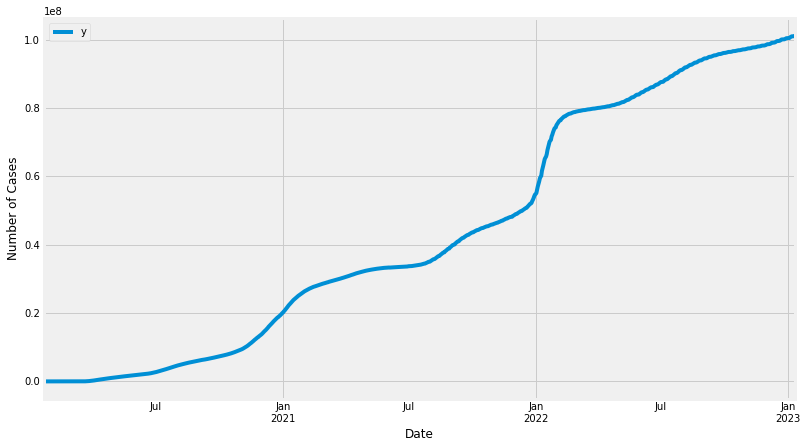

In [ ]:
ax = df.set_index('ds').plot(figsize=(12, 7))
ax.set_ylabel('Number of Cases')
ax.set_xlabel('Date')
plt.show()

### Fit the model to predict cases

In [ ]:
m_model = Prophet()
m_model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


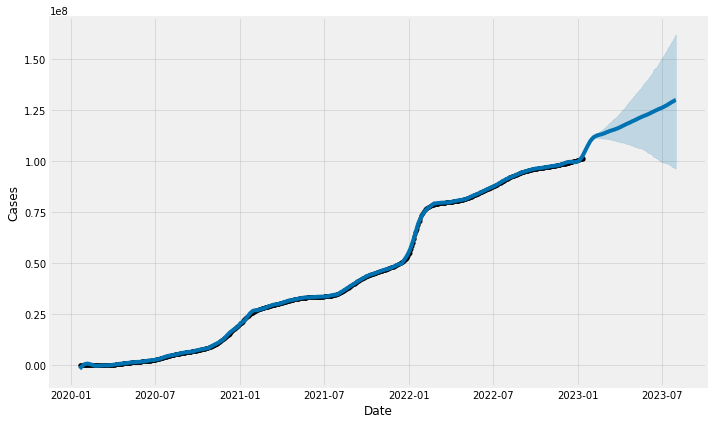

In [ ]:
future_cases = m_model.make_future_dataframe(periods=200,freq="D")
forecast=m_model.predict(future_cases)
fig_Confirmed = m_model.plot(forecast,xlabel = "Date",ylabel = "Cases")

### Prophet for the second column "Deaths"
##### Drop the column cases

In [ ]:
df1 = df1.drop(['cases'], axis=1)
df1

,date,deaths
0,2020-01-21,0
1,2020-01-22,0
2,2020-01-23,0
3,2020-01-24,0
4,2020-01-25,0
...,...,...
1082,2023-01-07,1103530
1083,2023-01-08,1103533
1084,2023-01-09,1103732
1085,2023-01-10,1104459


### Change the column name

In [ ]:
df1 = df1.rename(columns={'date': 'ds','deaths': 'y'})
df1.head()

,ds,y
0,2020-01-21,0
1,2020-01-22,0
2,2020-01-23,0
3,2020-01-24,0
4,2020-01-25,0


### Visualize the data

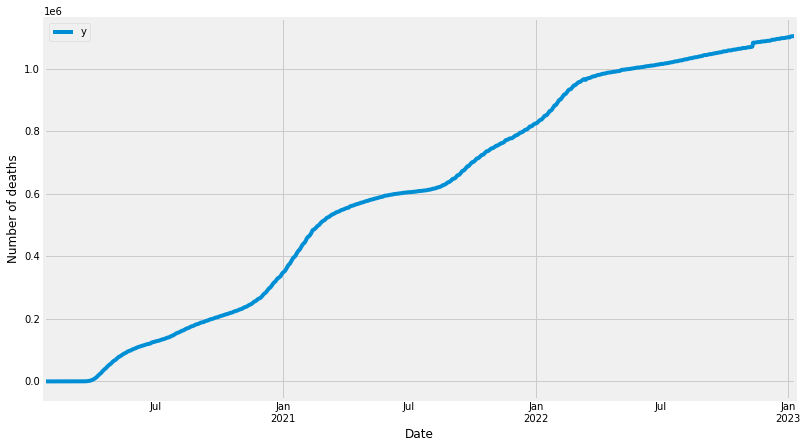

In [ ]:
ax = df1.set_index('ds').plot(figsize=(12, 7))
ax.set_ylabel('Number of deaths')
ax.set_xlabel('Date')
plt.show()

### Fit the model to predict the deaths

In [ ]:
m1_model = Prophet()
m1_model.fit(df1)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


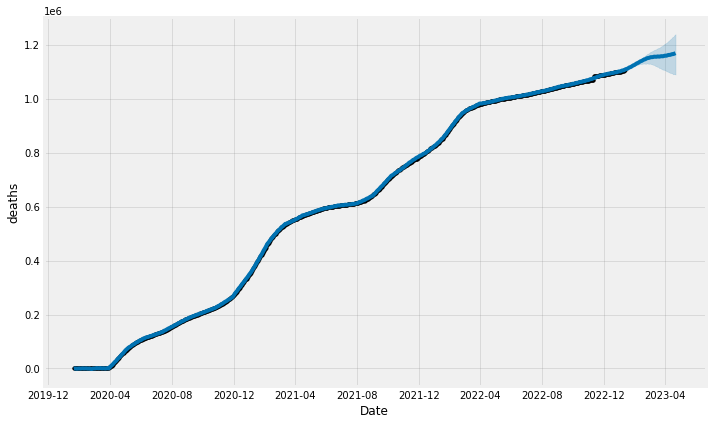

In [ ]:
future = m1_model.make_future_dataframe(periods=100,freq='D')
forecast=m1_model.predict(future)
fig_Confirmed = m1_model.plot(forecast,xlabel = "Date",ylabel = "deaths")